## Data Science Intern at Let's Grow more June 2023

## Intermediate Level Task

## Prediction using Decision Tree Algorithm on Dataset - Iris

## Mohammad Aamir Rangrez

# **Table of Contents:**
* Import Libraries
* Getting the Data
* Data exploration/Analysis
* Data Preprocessing
* Outliers
    - Plot of Indepndent Numerical Variable
    - Plotted Outliers of SepalWidthCm by each Species
* Histogram Of independent variables
* Summary Statistics
* Exploring Independent variables
* Exploring the Dependent variable
* Create the Target and predictor matrix 
* Create the split test and  training dataset
* Feature Importance
* Make predictions on Test dataset
* Performance Metrics Train data
* Performance Metrics Test data
* Plot confusion matrix 
* ROC Curve
* Observations
* Interpretation
* Optimizing Decision Tree Performance
    - Selecting the optimal depth of the tree
* Building decision tree with Classifier depth of 3
    - Feature Importance 
*  Make predictions 
* Performance Metrics Train data - Optimal depth=3
* Performance Metrics Test data - Optimal depth=3
* Plot confusion matrix
*   HyperParameter Tuning -GridSearch-Cross Validation
* Feature Importance 
* Make predictions 
* Performance Metrics Train data
* Performance Metrics Test data
* Decision Tree Visualisation:Best Estimator
* Compairing Results


# 1 ) Importing Libraries

Importing the OS module for changing working Directory.
chdir method in OS module changes the current directory to thedirectory containing data set that I will use for the demo.
PANDAS,NUMPY for data manuplation.
Matplotlib,seaborn module for Data Visualisation. 
Importing Decision Tree Regressor, and GridSearchCV for decision trees

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from io import StringIO
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn import tree
import sklearn.metrics as metrics
from dtreeviz.trees import dtreeviz
from sklearn import tree

# Getting the datset

In [2]:
iris  =pd.read_csv('Iris.csv')
print('Shape of the Dataset-->',iris.shape)
print('dtypes of the Dataset-->',iris.dtypes)
iris.head(5)

Shape of the Dataset--> (150, 6)
dtypes of the Dataset--> Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data preprocessing of Training Dataset

Checking all the attributes for missing values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


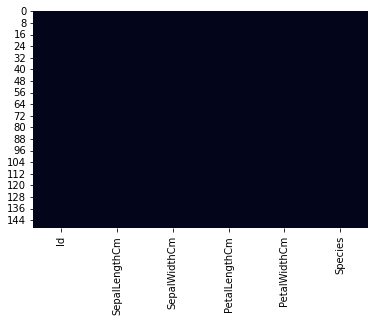

In [3]:
sns.heatmap(iris.isnull(),cbar=False)
print(iris.isnull().sum())

# Outliers

## Plot of Indepndent Numerical Variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

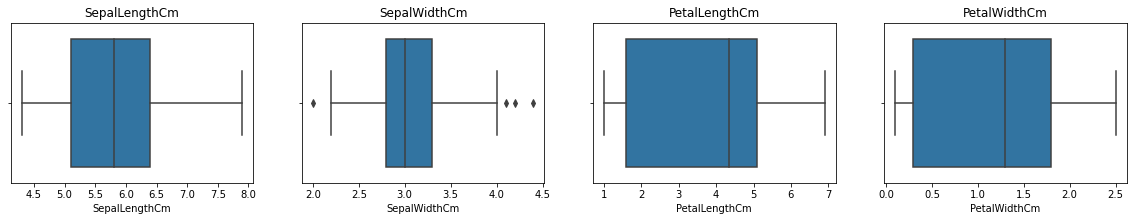

In [4]:
plt.figure(figsize=(20, 10))
X=iris.drop(['Species','Id'], axis=1)
for i, col in enumerate(X.columns):
    plt.subplot(3, 4, i+1)
    x = iris[col]
    sns.boxplot(x)
    plt.title(col)


 Observed that SepalWidthCm has outliers. To further investigate FacetGrid plot is plotted below

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


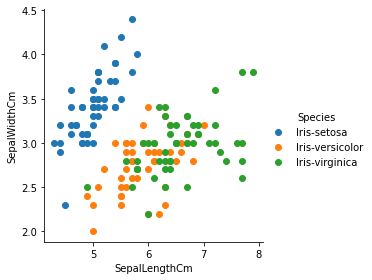

In [5]:
sns.FacetGrid(iris, hue="Species",size=4)\
    .map(plt.scatter, "SepalLengthCm","SepalWidthCm")\
    .add_legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


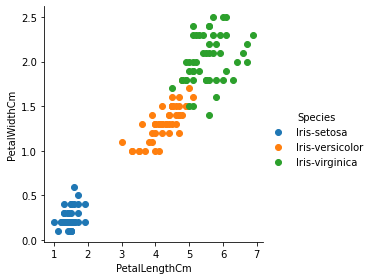

In [6]:
sns.FacetGrid(iris, hue="Species",size=4)\
    .map(plt.scatter, "PetalLengthCm","PetalWidthCm")\
    .add_legend();

###### Plotted Outliers of SepalWidthCm by each Species

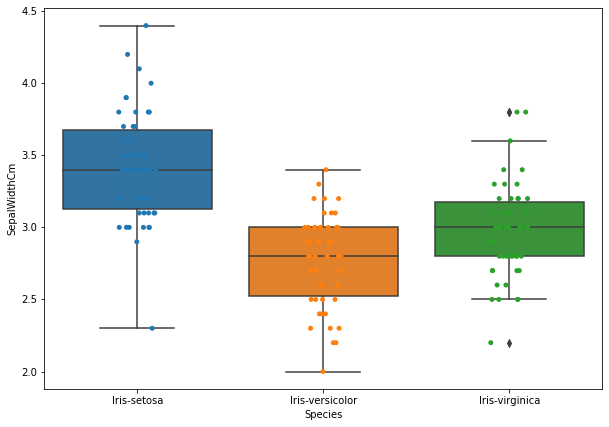

In [7]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig= sns.boxplot(x='Species',y='SepalWidthCm',data=iris)
fig = sns.stripplot(x='Species',y='SepalWidthCm',data=iris, jitter=True,edgecolor='Gray')

# Histogram Of independent variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

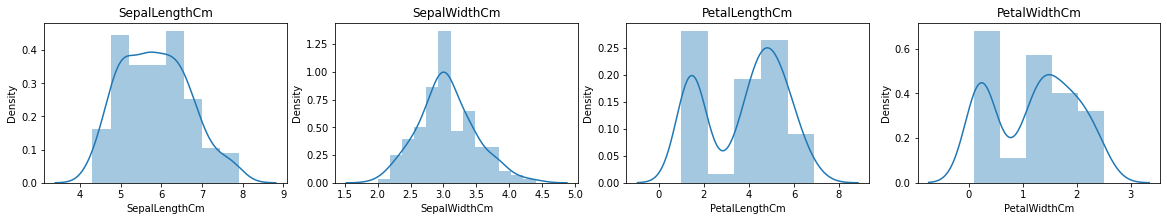

In [8]:
plt.figure(figsize=(20, 10))
df = iris.dropna()
for i, col in enumerate(X.columns):
    plt.subplot(3, 4, i+1)
    x = iris[col]
    sns.distplot(df[col]);
    plt.title(col)


# Summary Statistics

In [9]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


<AxesSubplot:>

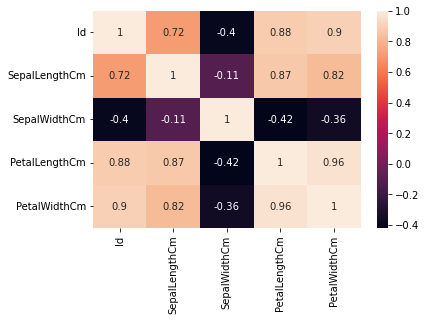

In [10]:
correlation_matrix = iris.corr()
sns.heatmap(data=correlation_matrix, annot=True)

### Exploring Independent variables

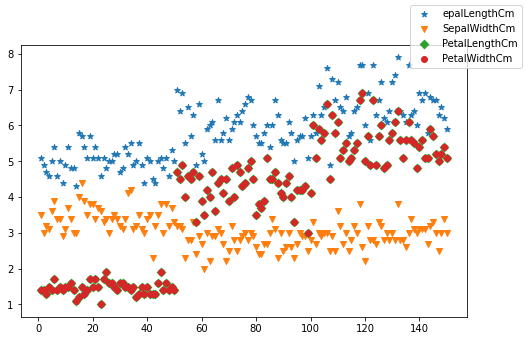

In [11]:
fig = plt.figure(figsize=(8,5))

plt.scatter(x = iris.Id, y= iris.SepalLengthCm, marker = "*")
plt.scatter(x = iris.Id, y= iris.SepalWidthCm, marker = "v")
plt.scatter(x = iris.Id, y= iris.PetalLengthCm, marker = "D")
plt.scatter(x = iris.Id, y= iris.PetalLengthCm, marker = "o")

fig.legend(labels=['epalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

# Exploring the Dependent variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


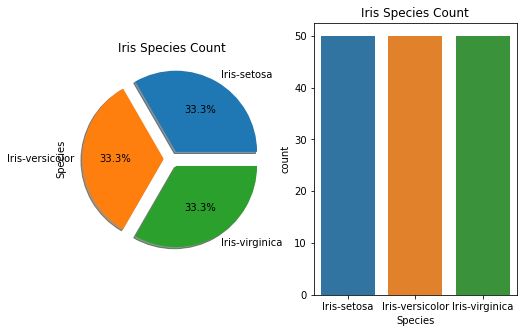

In [12]:
f,ax = plt.subplots(1,2,figsize=(8,5))
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Iris Species Count')
sns.countplot('Species',data=iris,ax=ax[1])
ax[1].set_title('Iris Species Count')
plt.show()

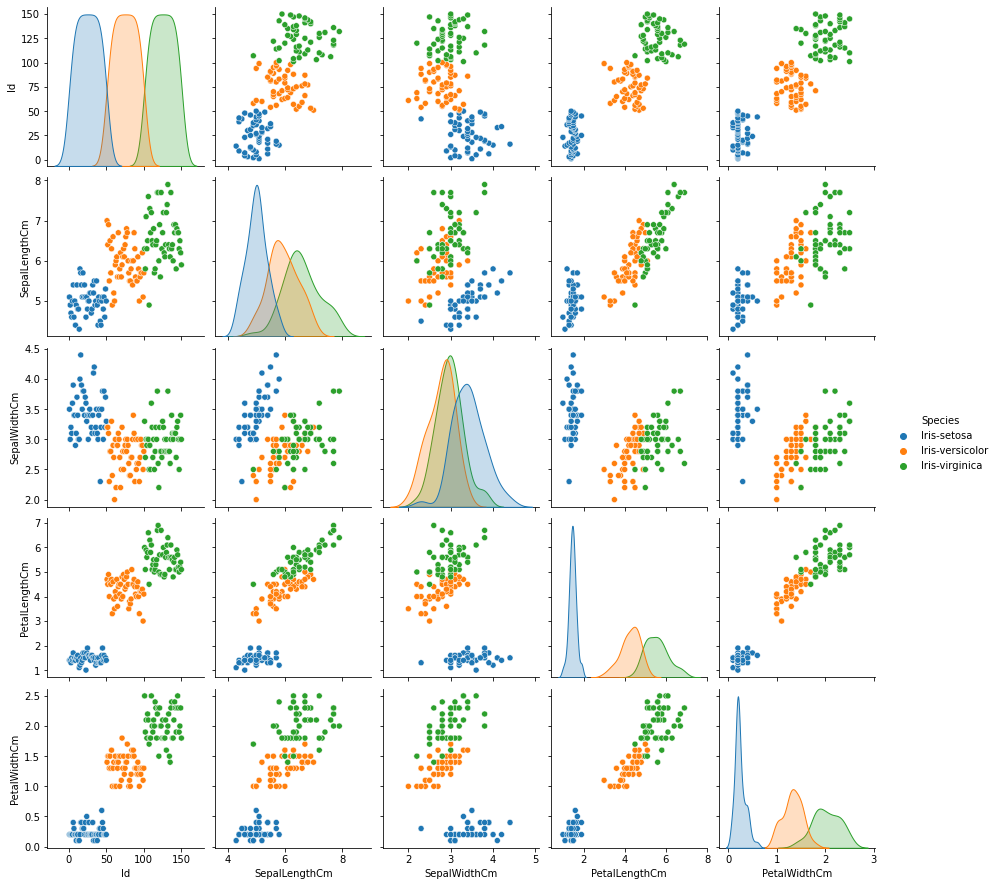

In [13]:
sns.pairplot(data=iris, hue='Species')

### Create the Target and predictor matrix

In [14]:
X = iris.drop(['Species','Id'],axis=1)
Y = iris['Species']

# Create the split test and  training dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1,stratify=Y)


In [16]:
print(f"X_train shape is {X_train.shape}")
print(f"X_test shape is {X_test.shape}")

print(f"Y_train shape is {Y_train.shape}")
print(f"Y_test shape is {Y_test.shape}")

X_train shape is (112, 4)
X_test shape is (38, 4)
Y_train shape is (112,)
Y_test shape is (38,)


## Build Decision Tree model: Default parameters

In [17]:
import sklearn.tree as tree
clf_d=tree.DecisionTreeClassifier(random_state=23)
clf_d.fit(X_train,Y_train)


DecisionTreeClassifier(random_state=23)

    In the case of a Categorical-valued attribute, split points for branches is where we have lower gini index

### Feature Importance

In [18]:
pd.Series(clf_d.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

PetalWidthCm     0.560702
PetalLengthCm    0.395440
SepalLengthCm    0.026000
SepalWidthCm     0.017859
dtype: float64

### Make predictions on Test dataset

In [19]:
predictions_d = clf_d.predict(X_test)
df=pd.DataFrame({'Actual':Y_test, 'Predicted':predictions_d}) 
#calculating probabilities of predictions
predict_prob=clf_d.predict_proba(X_test)

df.head()  


,Actual,Predicted
113,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
0,Iris-setosa,Iris-setosa
11,Iris-setosa,Iris-setosa
93,Iris-versicolor,Iris-versicolor


### Performance Metrics Train data

In [20]:
predictions_train = clf_d.predict(X_train)
print('Traning Accuarcy                                 :',clf_d.score(X_train, Y_train))
print('Accuracy score                                   :',accuracy_score(Y_train, predictions_train))
print('classification_report                            :')
print(classification_report(Y_train, predictions_train)) 

Traning Accuarcy                                 : 1.0
Accuracy score                                   : 1.0
classification_report                            :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      1.00      1.00        37
 Iris-virginica       1.00      1.00      1.00        37

       accuracy                           1.00       112
      macro avg       1.00      1.00      1.00       112
   weighted avg       1.00      1.00      1.00       112



# Performance Metrics Test data

In [21]:
print('Testing Accuarcy                                 :',clf_d.score(X_test, Y_test).round(4))
print('Accuracy score                                   :',accuracy_score(Y_test, predictions_d).round(4))
print('classification_report                            :')
print(classification_report(Y_test, predictions_d)) 

Testing Accuarcy                                 : 0.9737
Accuracy score                                   : 0.9737
classification_report                            :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



# Plot confusion matrix 

,Predicted Iris-setosa,"Predicted Iris-versicolor""","Predicted Iris-virginica"""
Actual Iris-setosa,12,0,0
Actual Iris-versicolor,0,13,0
"Actual Iris-virginica""",0,1,12


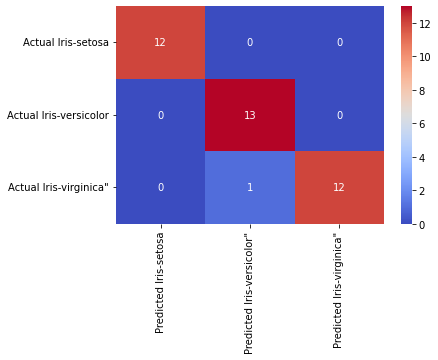

In [22]:
confusion = confusion_matrix(Y_test, predictions_d)
confusion_matrix_d = pd.DataFrame(confusion, index=['Actual Iris-setosa','Actual Iris-versicolor','Actual Iris-virginica"'], columns=['Predicted Iris-setosa','Predicted Iris-versicolor"','Predicted Iris-virginica"'])
_=sns.heatmap(confusion_matrix_d, cmap='coolwarm', annot=True)
confusion_matrix_d


## ROC Curve

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(truth, pred, average="macro"):

    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)

    return roc_auc_score(truth, pred, average=average)

def multiclass_roc_auc_plot(truth, pred, average="macro"):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes=3
    
    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(truth[:, i], pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    for i in (range(n_classes)):
        plt.plot(fpr[i], tpr[i], 
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()


ROC-AUC score of the model   : 0.9805128205128205


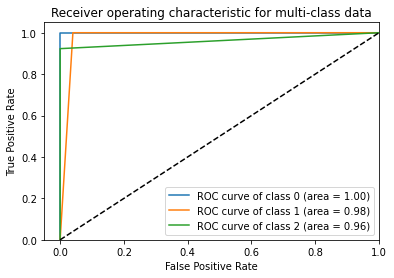

In [24]:
area_UnderCurve_d=multiclass_roc_auc_score(Y_test,predictions_d)
print('ROC-AUC score of the model   :',area_UnderCurve_d)
multiclass_roc_auc_plot(Y_test, predictions_d)

### Observations

    The higher the area under the curve the more it tells how good the classification model is at distinguishing between the classes of species.
                                   
    
                                        

### Interpretation

    In the decision tree chart, each internal node has a decision rule that splits the data. Gini, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

    Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. Let's optimize it    by pruning.

# Optimizing Decision Tree Performance

We will check the optimal depth of tree using hyperparameters

### Selecting the optimal depth of the tree

In [25]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
score_ls = [] 
score_acc_ls = []

for tree_depth in [1,2,3,4,5,6,7,8]:
            tree_model = DecisionTreeClassifier(max_depth=tree_depth,random_state=23)
            tree_model.fit(X_train, Y_train)
            
            scores = cross_val_score(tree_model, X_train,Y_train, cv=10, scoring='accuracy') 
            score_ls.append(np.mean(scores))
            predictions_op = tree_model.predict(X_test)
            acc_scores=  accuracy_score(Y_test, predictions_op)         
            score_acc_ls.append((acc_scores))
    
temp = pd.concat([pd.Series([1,2,3,4,5,6,7,8]), pd.Series(score_acc_ls).round(3)], axis=1)
temp.columns = ['depth', 'Accuracy score']
print(temp)

   depth  Accuracy score
0      1           0.658
1      2           0.947
2      3           0.974
3      4           0.974
4      5           0.947
5      6           0.974
6      7           0.974
7      8           0.974


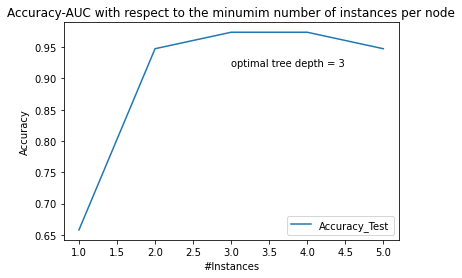

In [26]:
fig = plt.figure()
ax0 = fig.add_subplot(111)
acc_test = []
auc_test = []
for k in range(1,6):
        tree = DecisionTreeClassifier(max_depth=k,random_state=23)
        clf=tree.fit(X_train, Y_train) 
        predictions_test = clf.predict(X_test)
        acc_scores_test = accuracy_score(Y_test, predictions_test) 
        acc_test.append(acc_scores_test)
       
        
       
        scores_test = cross_val_score(clf, X_test,Y_test, cv=10, scoring='accuracy') 
     
        auc_test.append(np.mean(scores_test))
        
ax0.plot(range(1,6),acc_test,label='Accuracy_Test')
ax0.legend()
ax0.set_title('Accuracy-AUC with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.text(3, .92, "optimal tree depth = 3")
plt.show()


    The following chart shows the increase in the value of the Accuracy and the increase in accuracy with respect to number of estimators. Here the X-axis contains the number of estimators while the Y-axis contains the value for  accuracy.
    At depth=3 we see the accuracy is increasing. 

From the graph it is evident that the optimal tree depth is 3.Lets build the decision tree classifier with depth of 3

# Building decision tree with Classifier depth of 3

In [27]:
clf_op=DecisionTreeClassifier(random_state=11,max_depth=3)
clf_op.fit(X_train,Y_train)


DecisionTreeClassifier(max_depth=3, random_state=11)

In [28]:
clf_op.n_features_

4

### Feature Importance

In [29]:
pd.Series(clf_op.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

PetalWidthCm     0.589775
PetalLengthCm    0.410225
SepalLengthCm    0.000000
SepalWidthCm     0.000000
dtype: float64

### Make predictions 

In [30]:
predictions_op = clf_op.predict(X_test)
df=pd.DataFrame({'Actual':Y_test, 'Predicted':predictions_op})  
predict_prob_op=clf_op.predict_proba(X_test)
df.head()  


,Actual,Predicted
113,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
0,Iris-setosa,Iris-setosa
11,Iris-setosa,Iris-setosa
93,Iris-versicolor,Iris-versicolor


### Performance Metrics Train data -Optimal Depth=3

In [31]:
predictions_train_op = clf_op.predict(X_train)
print('Traning Accuarcy                                 :',clf_op.score(X_train, Y_train))
print('Accuracy score                                   :',accuracy_score(Y_train, predictions_train_op))
print('The number of correctly classified samples       :',accuracy_score(Y_train, predictions_train_op, normalize=False))
print('classification_report                            :')
print(classification_report(Y_train, predictions_train_op))


Traning Accuarcy                                 : 0.9553571428571429
Accuracy score                                   : 0.9553571428571429
The number of correctly classified samples       : 107
classification_report                            :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       0.90      0.97      0.94        37
 Iris-virginica       0.97      0.89      0.93        37

       accuracy                           0.96       112
      macro avg       0.96      0.95      0.95       112
   weighted avg       0.96      0.96      0.96       112



### Performance Metrics Test data - Optimal depth=3

In [32]:
print('Testing Accuarcy                                 :',clf_op.score(X_test, Y_test).round(4))
print('Accuracy score                                   :',accuracy_score(Y_test, predictions_op).round(4))
print('classification_report                            :')
print(classification_report(Y_test, predictions_op))


Testing Accuarcy                                 : 0.9737
Accuracy score                                   : 0.9737
classification_report                            :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



### Plot confusion matrix

,Predicted Iris-setosa,"Predicted Iris-versicolor""","Predicted Iris-virginica"""
Actual Iris-setosa,12,0,0
Actual Iris-versicolor,0,13,0
"Actual Iris-virginica""",0,1,12


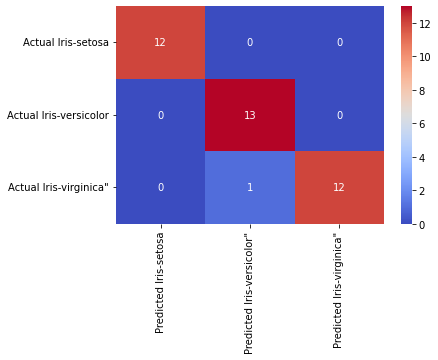

In [33]:
confusion = confusion_matrix(Y_test, predictions_op)
confusion_matrix_op = pd.DataFrame(confusion, index=['Actual Iris-setosa','Actual Iris-versicolor','Actual Iris-virginica"'], columns=['Predicted Iris-setosa','Predicted Iris-versicolor"','Predicted Iris-virginica"'])
_=sns.heatmap(confusion_matrix_op, cmap='coolwarm', annot=True)
confusion_matrix_op

ROC-AUC score of the model   : 0.9805128205128205


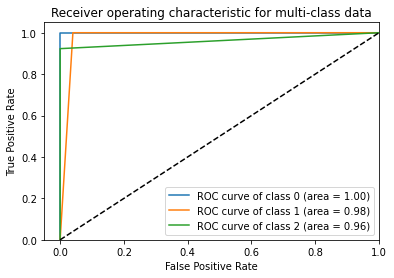

In [34]:
area_UnderCurve_op=multiclass_roc_auc_score(Y_test,predictions_op)
print('ROC-AUC score of the model   :',area_UnderCurve_op)
multiclass_roc_auc_plot(Y_test, predictions_d)

###  HyperParameter Tuning -GridSearch-Cross Validation

In [35]:
import sklearn.model_selection as model_selection
mod_cv=model_selection.GridSearchCV(clf_d,param_grid=[{'max_depth':[2,3,4,5,6,7,None],"max_features":[1,2,3,4]}],cv=10)
mod_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=23),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, None],
                          'max_features': [1, 2, 3, 4]}])

In [36]:
mod_cv.best_params_

{'max_depth': 4, 'max_features': 1}

In [37]:
model_cv=mod_cv.best_estimator_
print(model_cv)

DecisionTreeClassifier(max_depth=4, max_features=1, random_state=23)


In [38]:
mod_cv.best_score_

0.9462121212121211

### Feature Importance

In [39]:
pd.Series(model_cv.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

PetalWidthCm     0.455588
SepalLengthCm    0.421662
PetalLengthCm    0.103475
SepalWidthCm     0.019275
dtype: float64

### Make predictions 

In [40]:
predictions_cv = model_cv.predict(X_test)
df=pd.DataFrame({'Actual':Y_test, 'Predicted':predictions_cv})  
predict_prob_cv=model_cv.predict_proba(X_test)
df.head()  

,Actual,Predicted
113,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
0,Iris-setosa,Iris-setosa
11,Iris-setosa,Iris-setosa
93,Iris-versicolor,Iris-versicolor


### Performance Metrics Train data

In [41]:
predictions_train_cv = model_cv.predict(X_train)
print('Traning Accuarcy                                 :',model_cv.score(X_train, Y_train))
print('Accuracy score                                   :',accuracy_score(Y_train, predictions_train_cv))
print('The number of correctly classified samples       :',accuracy_score(Y_train, predictions_train_cv, normalize=False))
print('classification_report                            :')
print(classification_report(Y_train, predictions_train_cv))

Traning Accuarcy                                 : 0.9732142857142857
Accuracy score                                   : 0.9732142857142857
The number of correctly classified samples       : 109
classification_report                            :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       0.93      1.00      0.96        37
 Iris-virginica       1.00      0.92      0.96        37

       accuracy                           0.97       112
      macro avg       0.97      0.97      0.97       112
   weighted avg       0.98      0.97      0.97       112



### Performance Metrics Test data

In [42]:
print('Testing Accuarcy                                 :',model_cv.score(X_test, Y_test))
print('Accuracy score                                   :',accuracy_score(Y_test, predictions_cv))
print('classification_report                            :')
print(classification_report(Y_test, predictions_cv))


Testing Accuarcy                                 : 0.9736842105263158
Accuracy score                                   : 0.9736842105263158
classification_report                            :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



### Plot confusion matrix

,Predicted Iris-setosa,"Predicted Iris-versicolor""","Predicted Iris-virginica"""
Actual Iris-setosa,12,0,0
Actual Iris-versicolor,0,13,0
"Actual Iris-virginica""",0,1,12


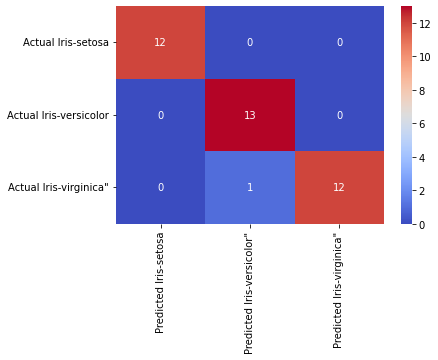

In [43]:
confusion = confusion_matrix(Y_test, predictions_op)
confusion_matrix_cv = pd.DataFrame(confusion, index=['Actual Iris-setosa','Actual Iris-versicolor','Actual Iris-virginica"'], columns=['Predicted Iris-setosa','Predicted Iris-versicolor"','Predicted Iris-virginica"'])
_=sns.heatmap(confusion_matrix_cv, cmap='coolwarm', annot=True)
confusion_matrix_cv

ROC-AUC score of the model   : 0.9805128205128205


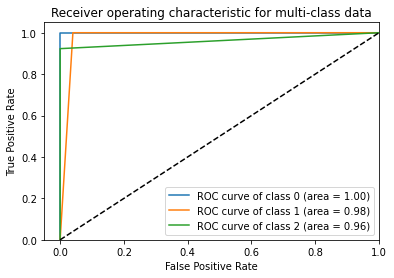

In [44]:
area_UnderCurve_cv=multiclass_roc_auc_score(Y_test,predictions_op)
print('ROC-AUC score of the model   :',area_UnderCurve_cv)
multiclass_roc_auc_plot(Y_test, predictions_d)

## Decision Tree Visualisation:Best Estimator

In [45]:
model_cv=mod_cv.best_estimator_
model_cv

DecisionTreeClassifier(max_depth=4, max_features=1, random_state=23)

## Comparing results 

In [46]:
print('       ############   Metrics with Decision tree-No parameters    ############')
print('Accuracy score                                   :',accuracy_score(Y_test, predictions_d).round(4))
print('Total number of Observations in test sample      :', Y_test.shape)
print('The number of correctly classified samples       :',accuracy_score(Y_test, predictions_d, normalize=False))
print('Area under curve -->',area_UnderCurve_d.round(4))
confusion_matrix_d

       ############   Metrics with Decision tree-No parameters    ############
Accuracy score                                   : 0.9737
Total number of Observations in test sample      : (38,)
The number of correctly classified samples       : 37
Area under curve --> 0.9805


,Predicted Iris-setosa,"Predicted Iris-versicolor""","Predicted Iris-virginica"""
Actual Iris-setosa,12,0,0
Actual Iris-versicolor,0,13,0
"Actual Iris-virginica""",0,1,12


In [47]:
print('       ############    Metrics with Optimal Depth     ############')
print('Accuracy score                                   :',accuracy_score(Y_test, predictions_op).round(4))
print('The number of correctly classified samples       :',accuracy_score(Y_test, predictions_op, normalize=False))
print('Total number of Observations in test sample      :', Y_test.shape)
print('Area under curve -->',area_UnderCurve_op.round(4))
confusion_matrix_op

       ############    Metrics with Optimal Depth     ############
Accuracy score                                   : 0.9737
The number of correctly classified samples       : 37
Total number of Observations in test sample      : (38,)
Area under curve --> 0.9805


,Predicted Iris-setosa,"Predicted Iris-versicolor""","Predicted Iris-virginica"""
Actual Iris-setosa,12,0,0
Actual Iris-versicolor,0,13,0
"Actual Iris-virginica""",0,1,12


In [48]:
print('Metrics with GridSearch CV')
print('Accuracy score                                   :',accuracy_score(Y_test, predictions_cv).round(4))
print('The number of correctly classified samples       :',accuracy_score(Y_test, predictions_cv, normalize=False))
print('Area under curve -->',area_UnderCurve_cv.round(4))
confusion_matrix_cv

Metrics with GridSearch CV
Accuracy score                                   : 0.9737
The number of correctly classified samples       : 37
Area under curve --> 0.9805


,Predicted Iris-setosa,"Predicted Iris-versicolor""","Predicted Iris-virginica"""
Actual Iris-setosa,12,0,0
Actual Iris-versicolor,0,13,0
"Actual Iris-virginica""",0,1,12
